# ROC curves

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from os.path import join as opj
import os

## Global variables

In [95]:
sbj_list = ["P3SBJ01", "P3SBJ02", "P3SBJ03", "P3SBJ04", "P3SBJ05", "P3SBJ06", "P3SBJ07", "P3SBJ08", "P3SBJ09", "P3SBJ10"]
run_list = ["Events01", "Events02"]
exclude_list = ["P3SBJ05_Events02", "P3SBJ06_Events02", "P3SBJ08_Events02", "P3SBJ10_Events02"]
model_list = ["SPFM_BIC.OC.SPMG1", "R2ONLY_BIC.SPMG1", "MEICA-R2ONLY_BIC.SPMG1", "MEICA-Mv_R2ONLY_DWM_T95.SPMG1", "MEICA_MvMEPFM_G0", "MEICA_MvMEPFM_G25"]
model_labels = ["SPFM OC", "MEPFM", "MEICA-MEPFM", "MEICA-MvMEPFM", "MEICA-MEPFM Stability", "MEICA-MvMEPFM Stability"]
model_colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65"] # "#beb9db", "#fdcce5", "#8bd3c7"]
target_list = ["SBJ", "EVENT_IM_P05", "EVENT_IM_P001"]
task_list = ["MUSI", "BMOT", "HOUS", "FTAP", "READ"]
task_labels = ["Auditory", "Biological Motion", "House Viewing", "Finger Tapping", "Reading"]
roc_dir = opj(os.getcwd(), "roc_curves")
column_names = ["Task", "Event", "Sensitivity", "Specificity", "Dice", "True Positives", "False Positives", "False Negatives", "True Negatives"]

## P=0.05

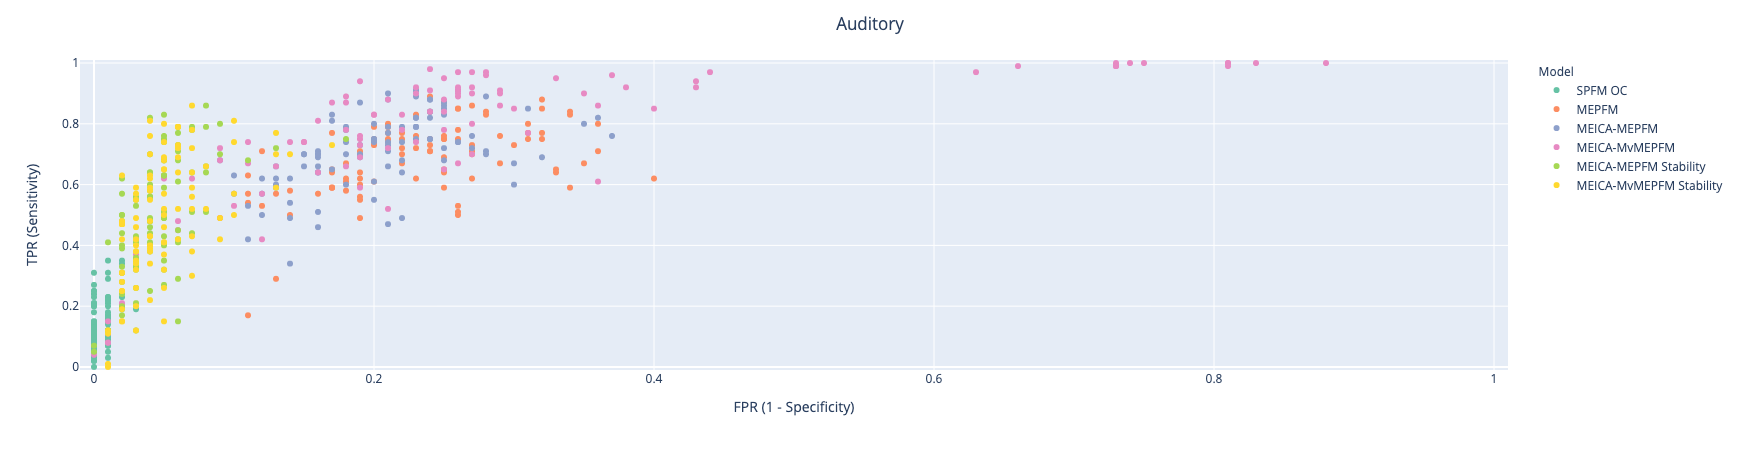

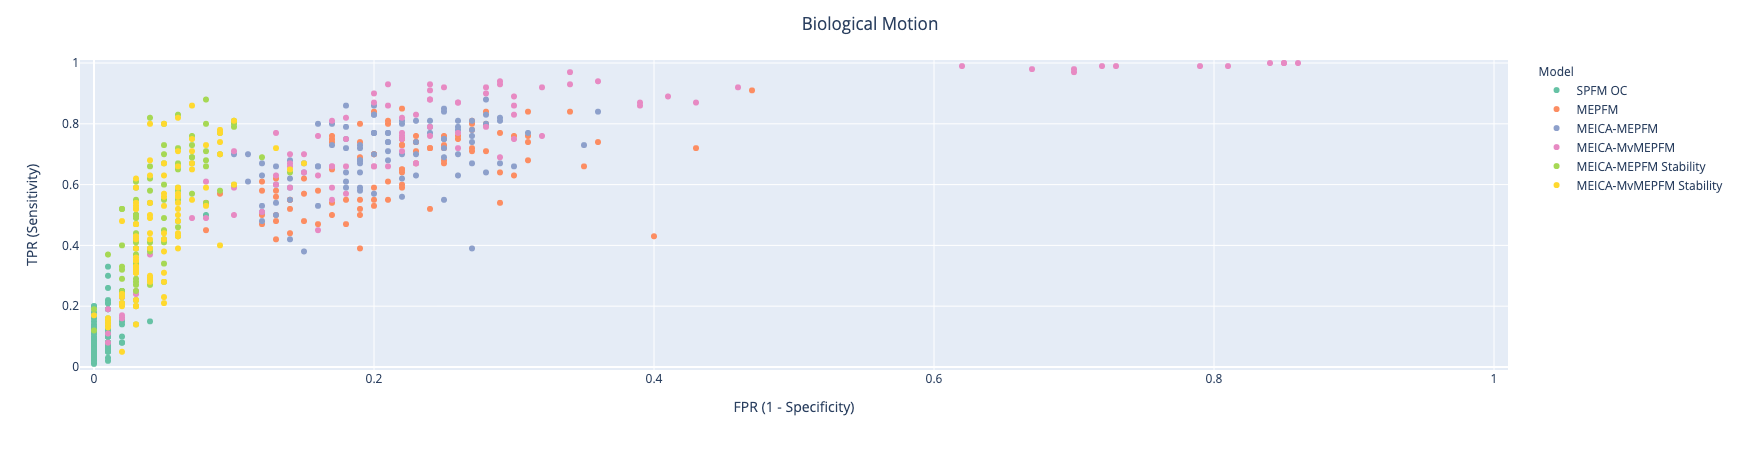

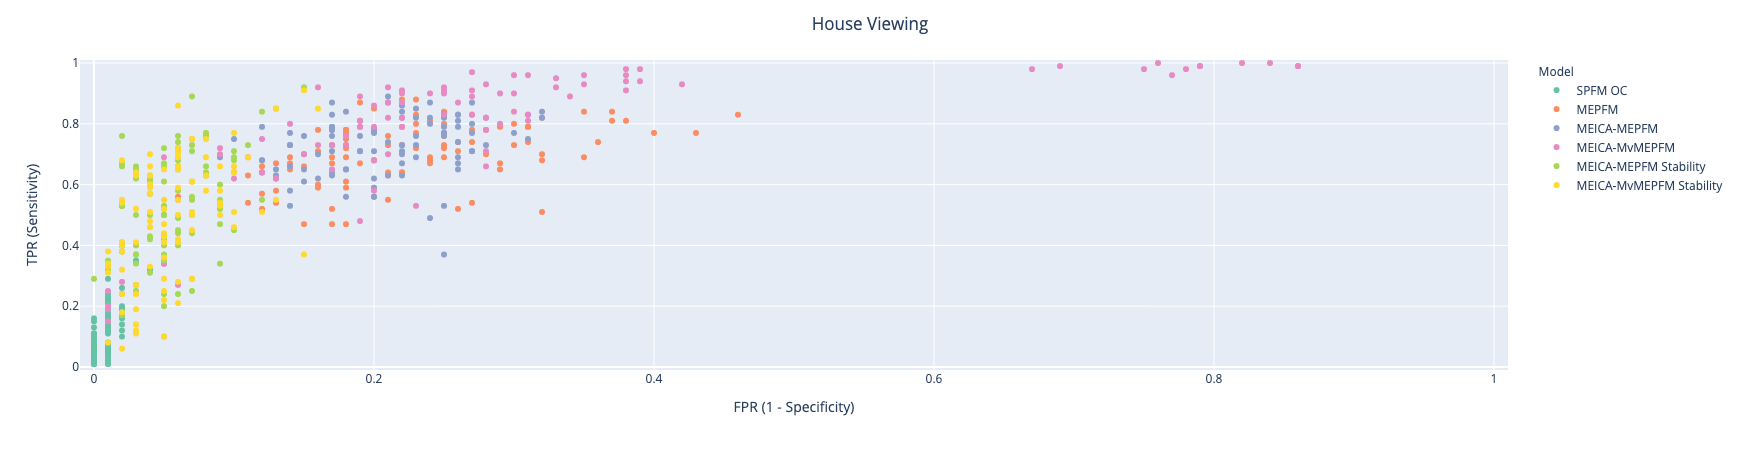

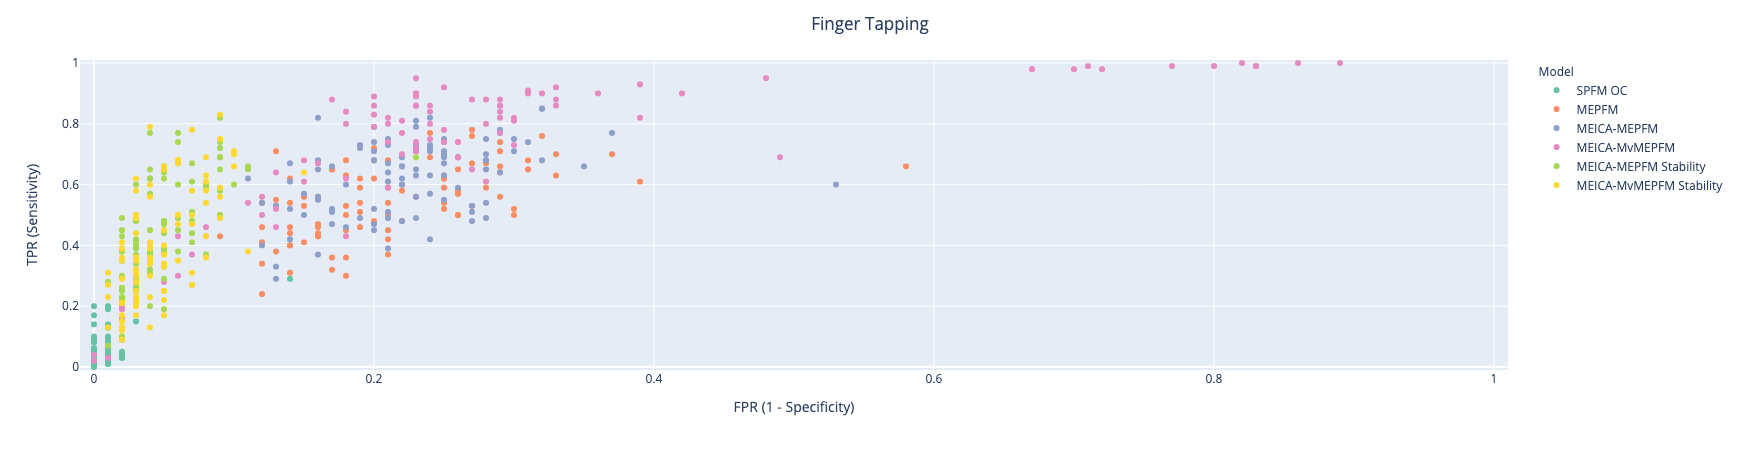

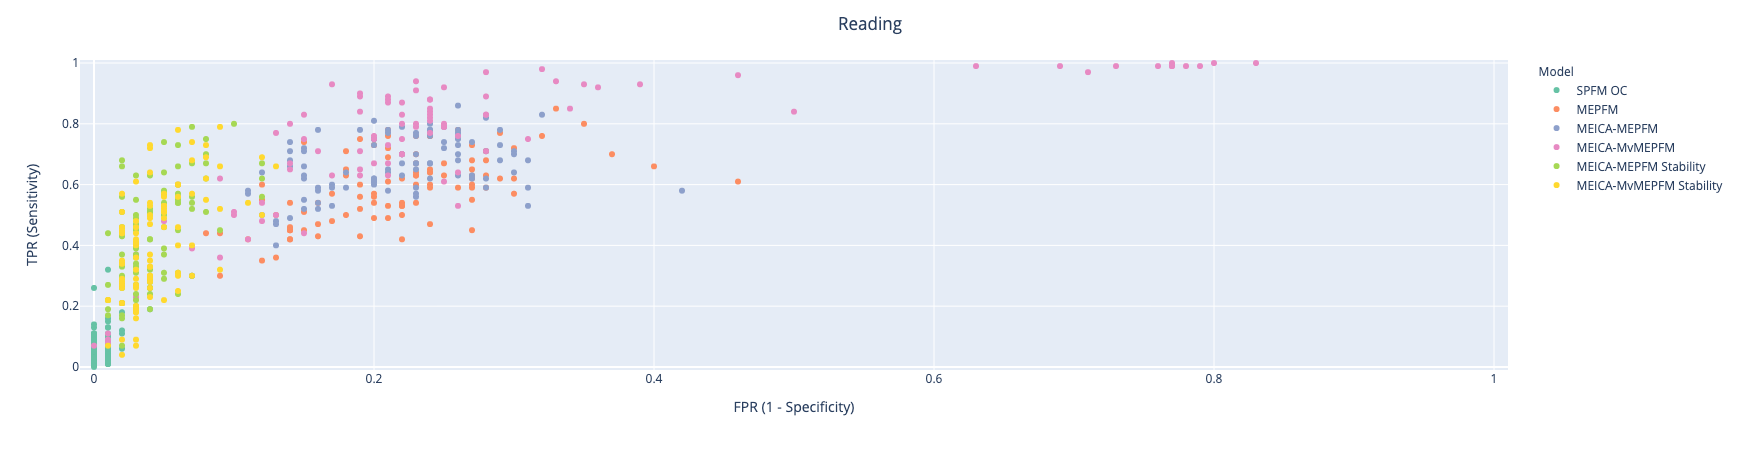

In [103]:
target = "EVENT_IM_P05"

for task_idx, task in enumerate(task_list):
    for sbj_idx, sbj in enumerate(sbj_list):
        for run_idx, run in enumerate(run_list):
            for model_idx, model in enumerate(model_list):

                filename = f"{sbj}_{run}_{task}.{model}.ROC_vs{target}.txt"

                if not any(excluded in filename for excluded in exclude_list):
                    temp_df = pd.read_csv(opj(roc_dir, sbj, filename), header=None, sep=" ", names=column_names, index_col=False)
                    temp_df = temp_df.join(pd.Series([model_labels[model_idx], model_labels[model_idx], model_labels[model_idx], model_labels[model_idx], model_labels[model_idx], model_labels[model_idx]], name="Model"))
                    temp_df = temp_df.join(pd.Series([sbj, sbj, sbj, sbj, sbj, sbj], name="Subject"))
                    temp_df = temp_df.join(pd.Series([run, run, run, run, run, run], name="Run"))

                    if model_idx == 0 and sbj_idx == 0 and run_idx == 0:
                        df = temp_df
                    else:
                        df = pd.concat([df, temp_df])


    df.reset_index(drop=True, inplace=True)
    df["Sensitivity"] = df["Sensitivity"].div(100).round(2)
    df["Specificity"] = df["Specificity"].div(100).round(2)
    df = df.join(pd.Series(1 - df["Specificity"], name="FPR"))
    
    fig = px.scatter(df, x="FPR", y="Sensitivity", color="Model", hover_data=["Dice", "Subject", "Run"], color_discrete_sequence=px.colors.qualitative.Set2, labels={"Sensitivity": "TPR (Sensitivity)", "FPR": "FPR (1 - Specificity)"})
    fig.update_layout(yaxis_range=[-0.01,1.01], xaxis_range=[-0.01, 1.01], title={"text": task_labels[task_idx], "x": 0.5})
    fig.show()